In [47]:
import pandas as pd
import numpy as np

In [48]:
data = pd.read_csv('blogtext.csv')

In [49]:
data.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [50]:
data.shape

(681284, 7)

In [51]:
data.isnull().any()

id        False
gender    False
age       False
topic     False
sign      False
date      False
text      False
dtype: bool

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
tp = data.groupby(['age']).count()[['topic']]

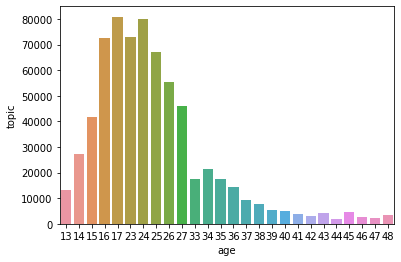

In [17]:
sns.barplot(x=tp.index, y=tp.topic)

In [18]:
tc = data.groupby(['gender']).count()[['sign']]

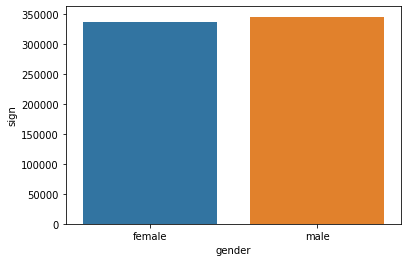

In [19]:
sns.barplot(x=tc.index, y=tc.sign)

In [71]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')  # Download data for tokenizer.
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
#Let us take 10,000 rows.
data2 = data.loc[0:10000]

In [52]:
data2.shape

(10001, 7)

In [53]:
data2.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [54]:
data2.loc[:,"text"] = data2.text.apply(lambda x : str.lower(x))

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [55]:
import re
data2.loc[:,"text"] = data2.text.apply(lambda x : " ".join(re.findall('[\w]+',x)))

In [56]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')

def remove_stopWords(s):
    '''For removing stop words
    '''
    s = ' '.join(word for word in s.split() if word not in stop_words)
    return s


data2.loc[:,"text"] = data2.text.apply(lambda x: remove_stopWords(x))

In [57]:
data2.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 4 5 mb pdf files now wait...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoo s toolbar can now capture urls po...


In [79]:
#Here we can see that some numeric characters have not been removed.

In [58]:
data2['text'] = data2['text'].str.replace(r'\d+','')

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
data2.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found pages mb pdf files now wait unti...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoo s toolbar can now capture urls po...


In [60]:
data2.drop(['date','id'],axis=1,inplace=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [61]:
data2.head(5)

,gender,age,topic,sign,text
0,male,15,Student,Leo,info found pages mb pdf files now wait unti...
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing testing
4,male,33,InvestmentBanking,Aquarius,thanks yahoo s toolbar can now capture urls po...


In [62]:
data2['Lables'] = data2[data2.columns[:-1]].apply(lambda x: ','.join(x.astype(str)), axis=1)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
data2.head(5)

,gender,age,topic,sign,text,Lables
0,male,15,Student,Leo,info found pages mb pdf files now wait unti...,"male,15,Student,Leo"
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...,"male,15,Student,Leo"
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...,"male,15,Student,Leo"
3,male,15,Student,Leo,testing testing,"male,15,Student,Leo"
4,male,33,InvestmentBanking,Aquarius,thanks yahoo s toolbar can now capture urls po...,"male,33,InvestmentBanking,Aquarius"


In [64]:
data2['Lables2'] = data2['Lables'].str.split(',')

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
data2.head(5)

,gender,age,topic,sign,text,Lables,Lables2
0,male,15,Student,Leo,info found pages mb pdf files now wait unti...,"male,15,Student,Leo","[male, 15, Student, Leo]"
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...,"male,15,Student,Leo","[male, 15, Student, Leo]"
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...,"male,15,Student,Leo","[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing testing,"male,15,Student,Leo","[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,thanks yahoo s toolbar can now capture urls po...,"male,33,InvestmentBanking,Aquarius","[male, 33, InvestmentBanking, Aquarius]"


In [66]:
data3 = data2.copy()

In [67]:
data3.drop(['gender','age','topic','sign','Lables'],axis=1,inplace=True)

In [68]:
data3.head(5)

,text,Lables2
0,info found pages mb pdf files now wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo s toolbar can now capture urls po...,"[male, 33, InvestmentBanking, Aquarius]"


In [69]:
X = data3['text']
y = data3['Lables2']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=8)

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [72]:
X_train_dtm.shape

(8000, 540509)

In [73]:
X_test_dtm.shape

(2001, 540509)

In [74]:
print (X_train_dtm)

  (0, 489262)	1
  (0, 442713)	1
  (0, 316141)	1
  (0, 54632)	1
  (0, 195958)	1
  (0, 147323)	1
  (0, 411177)	1
  (0, 281260)	1
  (0, 351709)	1
  (0, 524141)	1
  (0, 498728)	1
  (0, 161530)	1
  (0, 247457)	1
  (0, 61798)	1
  (0, 502150)	1
  (0, 302667)	1
  (0, 61852)	1
  (0, 211931)	1
  (0, 302652)	1
  (0, 467163)	1
  (0, 63316)	1
  (0, 8699)	1
  (0, 207330)	1
  (0, 484269)	1
  (0, 116780)	1
  :	:
  (7998, 161007)	1
  (7998, 283861)	2
  (7998, 181783)	1
  (7998, 78423)	1
  (7998, 321602)	1
  (7998, 162694)	1
  (7998, 262081)	2
  (7998, 530326)	1
  (7998, 475166)	2
  (7998, 239982)	1
  (7998, 12007)	1
  (7998, 490758)	1
  (7998, 191410)	2
  (7998, 502541)	1
  (7998, 430893)	1
  (7998, 314887)	1
  (7999, 65928)	1
  (7999, 497159)	1
  (7999, 154236)	1
  (7999, 397246)	1
  (7999, 241994)	1
  (7999, 154227)	1
  (7999, 65917)	1
  (7999, 397191)	1
  (7999, 496938)	1


In [75]:
y2 = data2['Lables']

In [76]:
cv = CountVectorizer()   
cv_fit=cv.fit_transform(y2)    
word_list = cv.get_feature_names()    
count_list = cv_fit.toarray().sum(axis=0)


In [77]:
print (dict(zip(word_list,count_list)))

{'13': 42, '14': 212, '15': 602, '16': 440, '17': 1185, '23': 253, '24': 655, '25': 387, '26': 234, '27': 1054, '33': 136, '34': 553, '35': 2315, '36': 1708, '37': 33, '38': 46, '39': 79, '40': 1, '41': 20, '42': 14, '43': 6, '44': 3, '45': 16, '46': 7, 'accounting': 4, 'aquarius': 571, 'aries': 4198, 'arts': 45, 'automotive': 14, 'banking': 16, 'businessservices': 91, 'cancer': 504, 'capricorn': 215, 'communications': 99, 'consulting': 21, 'education': 270, 'engineering': 127, 'fashion': 1622, 'female': 4085, 'gemini': 150, 'humanresources': 2, 'indunk': 3288, 'internet': 118, 'investmentbanking': 70, 'law': 11, 'lawenforcement': 10, 'leo': 301, 'libra': 491, 'libraries': 17, 'male': 5916, 'marketing': 156, 'media': 99, 'museums': 17, 'non': 71, 'pisces': 455, 'profit': 71, 'publishing': 4, 'recreation': 80, 'religion': 9, 'sagittarius': 1097, 'science': 63, 'scorpio': 971, 'security': 10, 'sports': 80, 'student': 1137, 'taurus': 812, 'technology': 2654, 'telecommunications': 2, 'virg

In [78]:
print (len(cv.vocabulary_))

69


In [ ]:
#Note: Here we make a dictionary of the entire set of labels i.e complete y(before splitting)
#Hence the actual number of labels in the target column for 10,000 rows is 69

In [ ]:
#Next we use the multilabel binarizer to encode the labels of the target column in the test set and train set.

In [79]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_train2 = mlb.fit_transform(y_train)

In [80]:
y_test2 = mlb.transform(y_test)

In [ ]:
#We fit a simple logistic regression classifier with onevsrest to the train set.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier 
clf = LogisticRegression(solver='lbfgs',max_iter=200)
clf = OneVsRestClassifier(clf)

In [82]:
clf.fit(X_train_dtm, y_train2)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=200,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [83]:
y_pred_class = clf.predict(X_test_dtm)

In [84]:
y_pred_class

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [85]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print (metrics.accuracy_score(y_test2, y_pred_class))

0.31584207896051975


In [ ]:
#The accuracy we are getting is less for two reasons.
#Reason1- We have taken just 10,000 rows out of the entire text corpus which contains more than 6,00,000 records.
#Reason2- This is a multilabel classification. All the labels or classes present in the train set may not be present in the 
#test set.Thus leading to poor predictions by the model.
#Thus absolute accuracy might not be a right approach to evaluate our model in this case.
#We print the classification report and check the individual recall and precision value for each label.

In [87]:
from sklearn.metrics import classification_report
print (classification_report(y_test2,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.60      0.06      0.10        54
           2       0.77      0.30      0.43        99
           3       0.65      0.23      0.34        96
           4       0.78      0.33      0.46       250
           5       0.50      0.02      0.04        47
           6       0.57      0.16      0.25       123
           7       0.69      0.12      0.21        72
           8       0.75      0.07      0.14        40
           9       0.79      0.38      0.51       235
          10       0.73      0.31      0.43        26
          11       0.95      0.68      0.79       115
          12       0.71      0.60      0.65       460
          13       0.94      0.55      0.69       340
          14       0.00      0.00      0.00         5
          15       0.60      0.50      0.55         6
          16       1.00      0.15      0.27        13
          17       0.00    

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [89]:
from sklearn.metrics import f1_score
print ((f1_score(y_test2,y_pred_class, average='micro')))

0.6385985573384366


In [93]:
from sklearn.metrics import f1_score
print ((f1_score(y_test2,y_pred_class, average='macro')))

0.29691184863481124


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
#The weighted Average method calculates the F1 score for each class independently but while adding them,it uses weight
#.. which depends upon the number of true lables of each class, thus it favours the majority class.
#The micro Average method calculates the F1 based on global TP,FP,FN, thus not favouring any class in particular.
#It is to be noted that our model has shown better microavg accuracy.
#Finally, 'macro' calculates the F1 separated by class but not using weights for the aggregation,which resuls in a bigger penalisation when your model does not perform well with the minority classes.

In [ ]:
#Now we print 5 true labels and corresponding predicted labels.
#We use the inverse_transform feature of the multilabel binarizer to achieve this.

In [94]:
#To print actual and predicted lables......
y_pred_inversed = mlb.inverse_transform(y_pred_class) # just opposite of tranform means it will give the name of classes rather than 0,1 in classes
y_test2_inversed = mlb.inverse_transform(y_test2)
for i in range(5):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_dtm[i],
        ','.join(y_test2_inversed[i]),
        ','.join(y_pred_inversed[i])
    ))


Title:	  (0, 3383)	1
  (0, 6457)	1
  (0, 22112)	1
  (0, 41857)	1
  (0, 42305)	1
  (0, 70355)	1
  (0, 79152)	1
  (0, 84509)	1
  (0, 103721)	1
  (0, 107198)	1
  (0, 107616)	1
  (0, 121338)	1
  (0, 121501)	1
  (0, 133496)	1
  (0, 138925)	1
  (0, 152135)	1
  (0, 162694)	2
  (0, 163136)	1
  (0, 184581)	1
  (0, 213510)	1
  (0, 216294)	1
  (0, 218037)	2
  (0, 218220)	1
  (0, 219702)	1
  (0, 238352)	1
  :	:
  (0, 436667)	1
  (0, 436874)	1
  (0, 440631)	1
  (0, 440771)	1
  (0, 446254)	1
  (0, 446820)	1
  (0, 452428)	2
  (0, 452577)	1
  (0, 461852)	1
  (0, 463911)	1
  (0, 463969)	1
  (0, 465558)	1
  (0, 471363)	1
  (0, 474012)	1
  (0, 480382)	1
  (0, 485901)	1
  (0, 485929)	1
  (0, 489372)	1
  (0, 498818)	1
  (0, 499630)	1
  (0, 513067)	1
  (0, 513822)	1
  (0, 522126)	1
  (0, 522645)	1
  (0, 535146)	1
True labels:	17,Sagittarius,Student,male
Predicted labels:	male


Title:	  (0, 10928)	1
  (0, 10959)	1
  (0, 42520)	1
  (0, 42811)	1
  (0, 61226)	1
  (0, 63740)	1
  (0, 65485)	1
  (0, 65605)	1
  (0

In [ ]:
#Conclusion:
#The above set suffers from severe class imbalance and aslo the size of the data set taken when comapred to the size of the corpus is too small.
#We can observe that in general the model identifies the "gender" label correctly as there is sufficient samples
#... of both male and female in the data set and that too their distibution is also approximately equal.
#The model is unable to accurately recall other labels because of class imbalance problem.
#Moreover all the labels present in the train set may not be present in the test set and vice-versa. Thus hampering recall and accuracy.
#Better accuracy may be obtained when taking the entire corpus and using upsampling techniques for the minority class.